Практическая задача № 1, вариант 17
================================
Выполнил студент 303 группы Черный Илья
-------------------------------------------
# 1. Постановка задачи
Используя схему бегущего счёта и итерационные методы решить задачу:
$$
    \begin{cases}
        \displaystyle\frac{\partial u}{\partial t}+2u\exp(-u^2)\frac{\partial u}{\partial x} = 0 \quad  ,0<x\leq 1\\
        \displaystyle u(x,0)= \sin \frac{\pi x}{2},\quad u(0,t)=0\\
    \end{cases}
$$
# 2. Анализ задачи
## Характеристики
Уравнения характеристик:
$$
    \displaystyle \frac{dt}{1}=\frac{dx}{2u\exp(-u^2)}=\frac{du}{0}\\
$$
интегрируя, получим:
$$
    \begin{cases}
        (t-t_{0})2u^{*}\exp(-u^{*2})=x-x_0\\
        u^{*}=const\\
    \end{cases}
$$
откуда следуют уравнения двух семейств прямых:
$$
    1)\ t_{0}=0 :  \quad t=\frac{(x-x_0)\exp((\sin\frac{\pi x_0}{2})^2)}{2\sin\frac{\pi x_0}{2}}\\
    2)\ x_{0}=0 :  \quad x=0\\
$$
Т.е. второе семейство состоит из одной прямой $x=0$ стоит отметить, что лишь по этой прямой будет переноситься $u=0$. 
Построим характеристики:

<IPython.core.display.Javascript object>


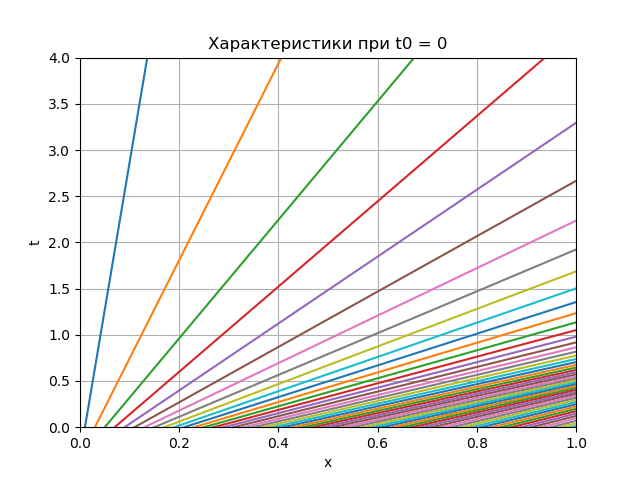

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import math
# характеристики при t0 = 0
def ch(x):
    return [(x-x0)*np.exp((np.sin(np.pi*x0/2))**2)/2/np.sin(np.pi*x0/2) for x0 in np.arange(0.01, 1.41, .02)]

x_arr = np.arange(0.01, 1.41, .02)
                   
ch_arr = [ch(x) for x in x_arr]
plt.ylim(0,4)
plt.xlim(0,1)
plt.plot(x_arr, ch_arr) 
plt.title('Характеристики при t0 = 0')
plt.ylabel('t')
plt.xlabel('x')
plt.grid(True)
plt.show()

Характеристики не пересекаются, как и предполагалось.
# 3. Решение численными методами
Сетка

Введем в области $\Omega=\{(x,t):0<x≤1,\  0<t<T\}$
сетку с шагом $h$ по $x$ и $\tau$ по $t$:
$$
    \displaystyle{\omega_{h,\ \tau}=
    \begin{cases}
        x_{n}=nh,\ \ h=\frac{1}{N},\ \ n=0,1,\dots N\\
        t_{j}=j\tau,\ \  \tau=\frac{1}{J},\  j=0,1,\dots J\\
    \end{cases}}
$$
На этой сетке мы будем рассматривать сеточную функцию  $y^{j}_{n}=u(x_{n},\ t_{j})$.
Так как наше квазилинейное уравнение аналогично линейному уравнению:
$$
    \displaystyle\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x} = 0
$$
И $c>0$ за исключением прямой $x=0$ воспользуемся следующей явной схемой:
$$
    \begin{cases}
        \displaystyle\frac{y^{j+1}_{n}−y^{j}_{n}}{\tau}+2y^{j}_{n}\exp(-(y^{j}_{n})^2)\frac{y^{j}_{n}-y^{j}_{n-1}}{h}= 0,\quad n= 1,2,\dots ,N,\ j= 0,1,\dots ,J−1\\
    \displaystyle y^{0}_{n}=\sin\frac{\pi x_{n}}{2},\quad n= 1,2,\dots ,N,\\
    \displaystyle y^{j}_{0}=0, \quad j= 0,1,\dots ,J−1\\
    \end{cases}
$$
С трёхточечным шаблоном:
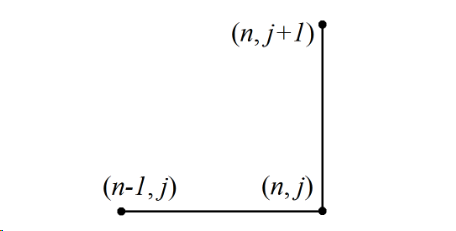
Такая схема сходится безусловно при выполнении следующего условия: $max\ y^{j}_{n}\tau\leq h$, $u\in (0,1]$, значит, $\tau\leq h$.

<IPython.core.display.Javascript object>


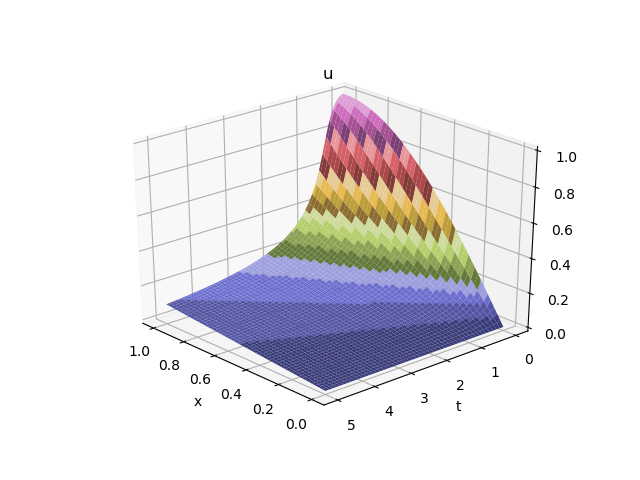

In [24]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import math

#шаги
N = 100; J = 1000 

#max|min x,t
xmax=1; tmax=5 
xmin=0; tmin=0            

#сетка
gr_x=np.linspace(xmin, xmax, N)
gr_t=np.linspace(tmin, tmax, J) 

#массив для сеточной ф-ии y(t,x)
y=np.zeros((J,N))      

#длины шагов
hx=gr_x[1]-gr_x[0]
ht=gr_t[1]-gr_t[0]      
#print(hx, ht)

#начальные/граничные условия
y[0,:]=np.sin(np.pi*gr_x/2)
y[:,0]=0
#print(y)

#собственно схема
def sch(a,b): 
    return (ht*(y[a,b]/ht-2*y[a,b]*np.exp(-y[a,b]**2)*(y[a,b]-y[a,b-1])/hx))
for i in range (1,N):
    for k in range (1,J):
        y[k,i]=sch(k-1,i)
        #print(y[k,i])
        
#визуализация 
from mpl_toolkits.mplot3d import axes3d

x, t = np.meshgrid(gr_x, gr_t)
fig = plt.figure()
o1 = fig.add_subplot(111, projection = '3d')
p1 = o1.plot_surface(x, t, y, cmap = 'tab20b')
o1.view_init(28, 138)
plt.title('u')
plt.xlabel('x')
plt.ylabel('t')
plt.show()